# Exploratory Data Analysis

In [212]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
from matplotlib.pyplot import figure
%matplotlib inline
sns.set(color_codes=True)

***
## Section 1 - Read in the data
### General Sanity Checks

In [213]:
data = pd.read_csv("mrm5_model_data.csv")

In [214]:
print(data.info)

<bound method DataFrame.info of          account_id  status  cos  rim_age  loan  s_plus_c  fico_b  ck_returns  \
0      FjWHEBLtghQ7  Closed    1        4     0         0     761         NaN   
1      NY9sb3zWSC7L  Closed    1       41     0         1     766         NaN   
2      CsgsApaKRyUc  Closed    1       42     0         1     636         NaN   
3      xtDoVry22KCc  Closed    1       42     0         1     507         NaN   
4      AY1ULa7dimU5  Closed    1       41     0         1     471         NaN   
...             ...     ...  ...      ...   ...       ...     ...         ...   
56671  klCLOY2EycCd  Active    0        0     0         1       0         NaN   
56672  Gj3ta4BAqFC6  Active    0        0     1         0       0         NaN   
56673  TyrkQdxcDaJU  Active    0        0     0         0       0         NaN   
56674  u5SzVvhz1S3U  Active    0        0     0         1       0         NaN   
56675  HbCPuxsnV1de  Active    0        0     0         1       0         NaN

In [215]:
data.describe()

,cos,rim_age,loan,s_plus_c,fico_b,ck_returns,max_days_neg,num_times_neg,ntriggers,avg_bal6,avg_bal3
count,56676.000000,56676.000000,56676.000000,56676.000000,56676.000000,835.000000,56676.000000,56676.000000,56676.000000,5.122600e+04,5.039600e+04
mean,0.009104,21.966088,0.288941,0.666526,519.410932,1.450299,1.530454,0.772285,0.431947,1.474701e+04,1.606729e+04
std,0.094982,12.395577,0.453274,0.471459,330.750199,1.142533,8.795420,4.069600,1.502197,5.145974e+04,5.677016e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-4.674000e+03,-6.230000e+03
25%,0.000000,11.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.300000e+01,4.900000e+01
50%,0.000000,22.000000,0.000000,1.000000,694.000000,1.000000,0.000000,0.000000,0.000000,1.036000e+03,1.107000e+03
75%,0.000000,33.000000,1.000000,1.000000,771.000000,1.000000,0.000000,0.000000,0.000000,8.356500e+03,9.405000e+03
max,1.000000,42.000000,1.000000,1.000000,844.000000,11.000000,376.000000,132.000000,21.000000,1.708350e+06,1.748436e+06


In [216]:
# What are the fields in the data
data.columns.tolist()

['account_id',
 'status',
 'cos',
 'rim_age',
 'loan',
 's_plus_c',
 'fico_b',
 'ck_returns',
 'max_days_neg',
 'num_times_neg',
 'ntriggers',
 'avg_bal6',
 'avg_bal3']

In [217]:
data.head()

,account_id,status,cos,rim_age,loan,s_plus_c,fico_b,ck_returns,max_days_neg,num_times_neg,ntriggers,avg_bal6,avg_bal3
0,FjWHEBLtghQ7,Closed,1,4,0,0,761,NaN,0,0,0,NaN,NaN
1,NY9sb3zWSC7L,Closed,1,41,0,1,766,NaN,0,0,0,NaN,NaN
2,CsgsApaKRyUc,Closed,1,42,0,1,636,NaN,1,1,2,NaN,NaN
3,xtDoVry22KCc,Closed,1,42,0,1,507,NaN,74,12,7,NaN,NaN
4,AY1ULa7dimU5,Closed,1,41,0,1,471,NaN,1,3,2,NaN,NaN


In [218]:
data.tail()

,account_id,status,cos,rim_age,loan,s_plus_c,fico_b,ck_returns,max_days_neg,num_times_neg,ntriggers,avg_bal6,avg_bal3
56671,klCLOY2EycCd,Active,0,0,0,1,0,NaN,0,0,0,NaN,NaN
56672,Gj3ta4BAqFC6,Active,0,0,1,0,0,NaN,0,0,0,NaN,NaN
56673,TyrkQdxcDaJU,Active,0,0,0,0,0,NaN,0,0,0,NaN,NaN
56674,u5SzVvhz1S3U,Active,0,0,0,1,0,NaN,0,0,0,NaN,NaN
56675,HbCPuxsnV1de,Active,0,0,0,1,0,NaN,0,0,0,NaN,NaN


***
***
##
## Section 2
+ ### Looking at the Variables Individually.
+ ### How do they compare/correlate/relate to target value COS?
+ ### Feature Engineering - Transform some fields to improve their predictability and prevent over-fitting within a classification models.

#### Note: For speed, I used Excel as a kind of scratch pad as a side tool to look at these fields, and for some common univariate analysis. The Excel file is not included, but is available upon request.

In [219]:
# Helper Functions
# These functions are used throughout this EDA, and bring a general 'feel' of the data.
# They check for completeness, range, outliers, other errors.

import matplotlib.pyplot as plt

def plot_catVar(var_name):
    valueCounts = data[var_name].value_counts()
    ind = list(valueCounts.index)
    val = list(valueCounts.values)
    fig = plt.figure(figsize=(30, 10))
    plt.bar(ind, val, color='blue', width=0.4)
    plt.ylabel("Counts")
    plt.xlabel(var_name.upper())
    plt.title("Counts of {} values".format(var_name.upper()))
    plt.show()

def check_catVar(var_name):
    unique_values = data[var_name].unique()
    valueCounts = data[var_name].value_counts()
    print("*** For the field {} ***".format(var_name))
    print("\nUnique values:\n", unique_values)
    print("\nThe value counts are:")
    print(valueCounts)
    print("\nCount of NULL {} values:".format(var_name), data[var_name].isnull().sum())
    print("Count of NA {} values:".format(var_name), data[var_name].isna().sum())
    print("Plot out Values")
    plot_catVar(var_name)

def check_contVar(var_name):
    print("\nCount of NULL {} values:".format(var_name), data[var_name].isnull().sum())
    print("Count of NA {} values:".format(var_name), data[var_name].isna().sum())
    print("Max value of {}:".format(var_name), data[var_name].max())
    print("Min value of {}:".format(var_name), data[var_name].min())
    print("Type of value", type(data[var_name].values))
    print("Random sample of values:\n", data[var_name].sample(n=10))

def CrossTabCheck(field):
    print(data[field].value_counts())
    print("\n")

    print("Normalize by bin, or portion of charge-offs.".upper())
    ct1 = pd.crosstab(data['cos'], data[field]).apply(lambda r: r / r.sum(), axis=0)
    print(ct1)

    print("\nNormalize by row, or portion of members.".upper())
    ct2 = pd.crosstab(data['cos'], data[field]).apply(lambda r: r / r.sum(), axis=1)
    print(ct2)

    print("\nDirect Counts.".upper())
    ct3 = pd.crosstab(data['cos'], data[field])
    print(ct3)

***
***
## <span style="color:red">TARGET: COS </span>
### Account Charge-Off Indicator
### Dependent or Target Variable
***

*** For the field cos ***

Unique values:
 [1 0]

The value counts are:
0    56160
1      516
Name: cos, dtype: int64

Count of NULL cos values: 0
Count of NA cos values: 0
Plot out Values


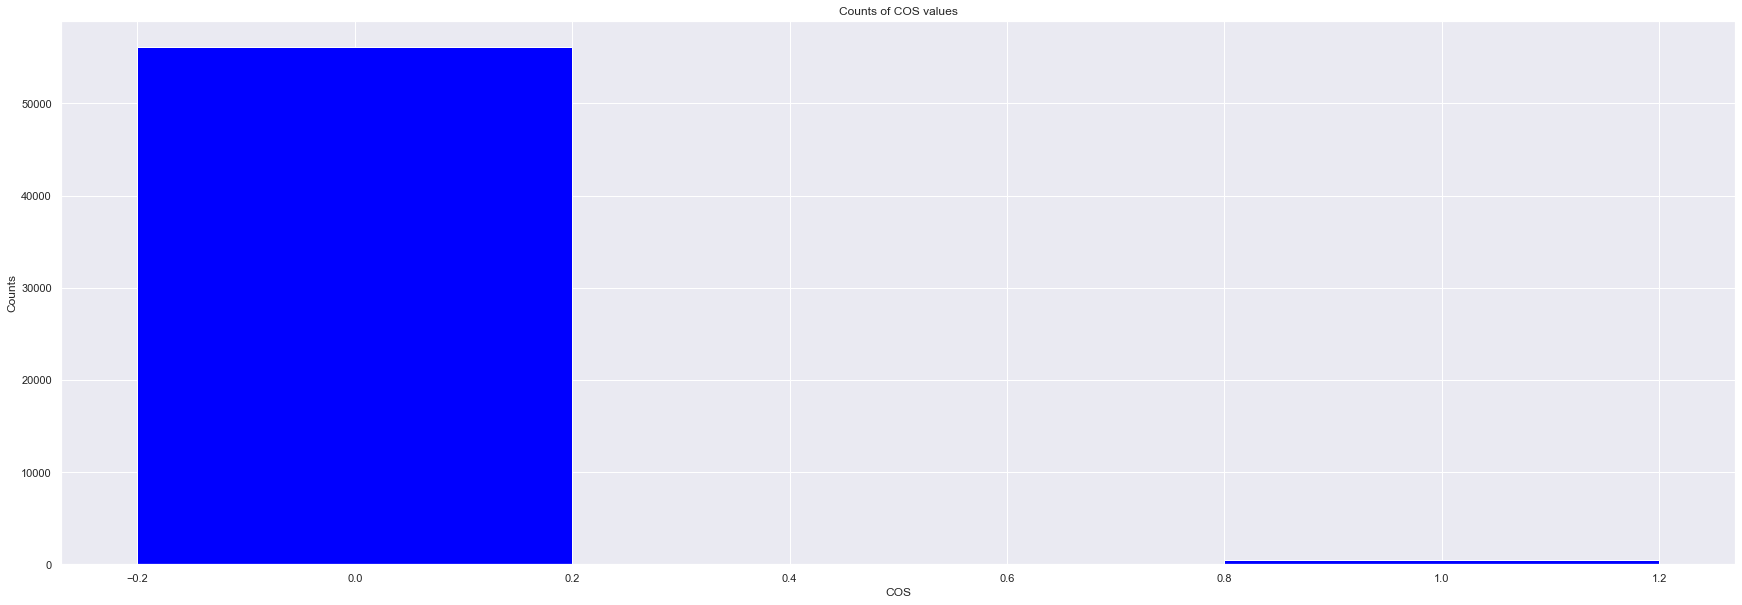

In [220]:
check_catVar('cos')


***
***
## <span style="color:red">INDEX: ACCOUNT_ID </span>
***

In [221]:
# Independent Field: account_id
# Is account_id unique and complete?
dups = data['account_id'].duplicated()
print("Number of duplicate account_id: ", dups.sum())
# Finding NULL values
print("Number of missing account_id:", data["account_id"].isnull().sum())

Number of duplicate account_id:  0
Number of missing account_id: 0


* **
***
## <span style="color:red">1: STATUS </span>
### Last status of account.
***

*** For the field status ***

Unique values:
 ['Closed' 'Active' 'Dormant' 'Unfunded' 'Restricted' 'Locked' 'Incomplete']

The value counts are:
Active        46256
Closed         7751
Dormant        1970
Unfunded        348
Restricted      247
Locked          100
Incomplete        4
Name: status, dtype: int64

Count of NULL status values: 0
Count of NA status values: 0
Plot out Values


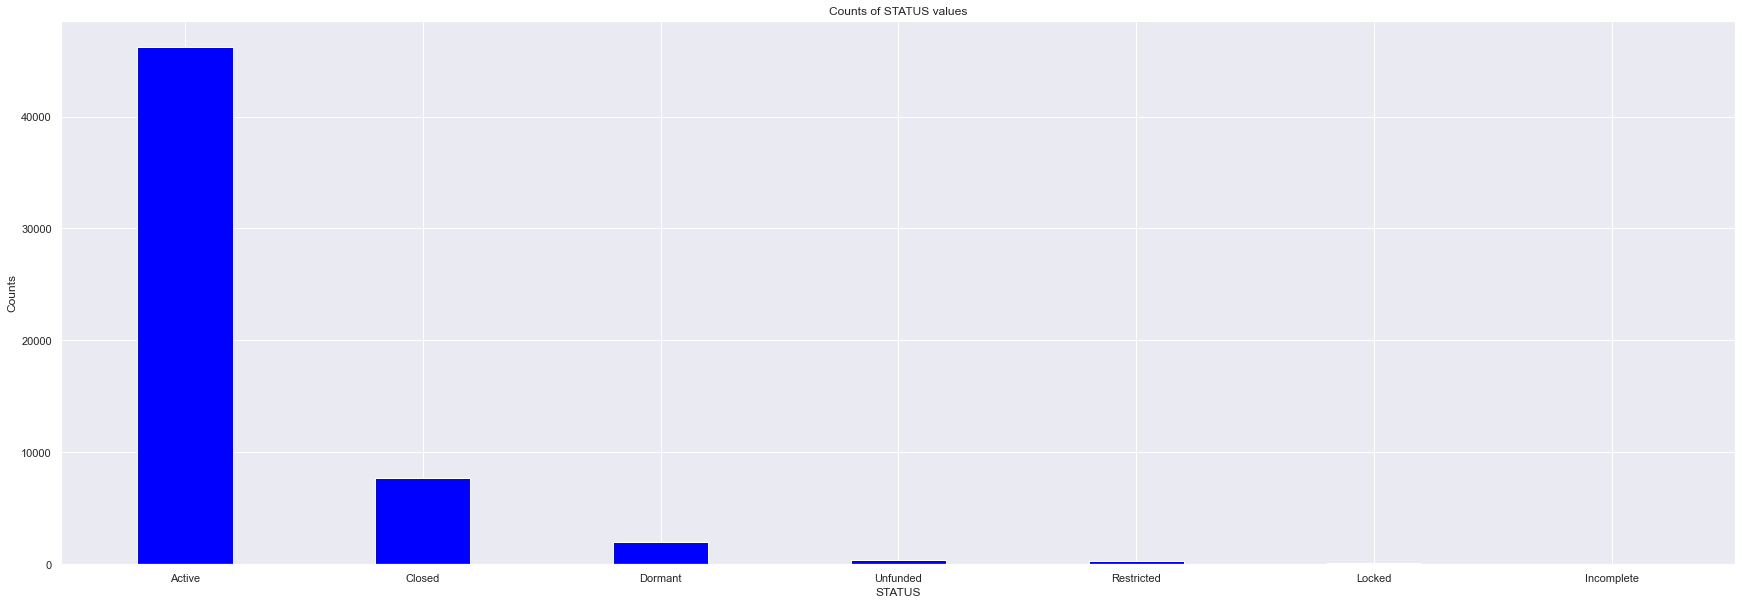

In [222]:
check_catVar('status')

In [223]:
# How does 'status' correlates with 'cos'?

In [224]:
pd.crosstab(data['cos'],data['status'])


status,Active,Closed,Dormant,Incomplete,Locked,Restricted,Unfunded
cos,,,,,,,
0,46256,7235,1970,4,100,247,348
1,0,516,0,0,0,0,0


Discussion on STATUS field:
All cos positive accounts are closed. Not all closed account are positive 'cos'.
516/7235 = 0.071, or %7.1 are closed and cos positive.

* **
***
## <span style="color:red">2: LOAN</span>
### Does account have any loan product associated with it?
***

*** For the field loan ***

Unique values:
 [0 1]

The value counts are:
0    40300
1    16376
Name: loan, dtype: int64

Count of NULL loan values: 0
Count of NA loan values: 0
Plot out Values


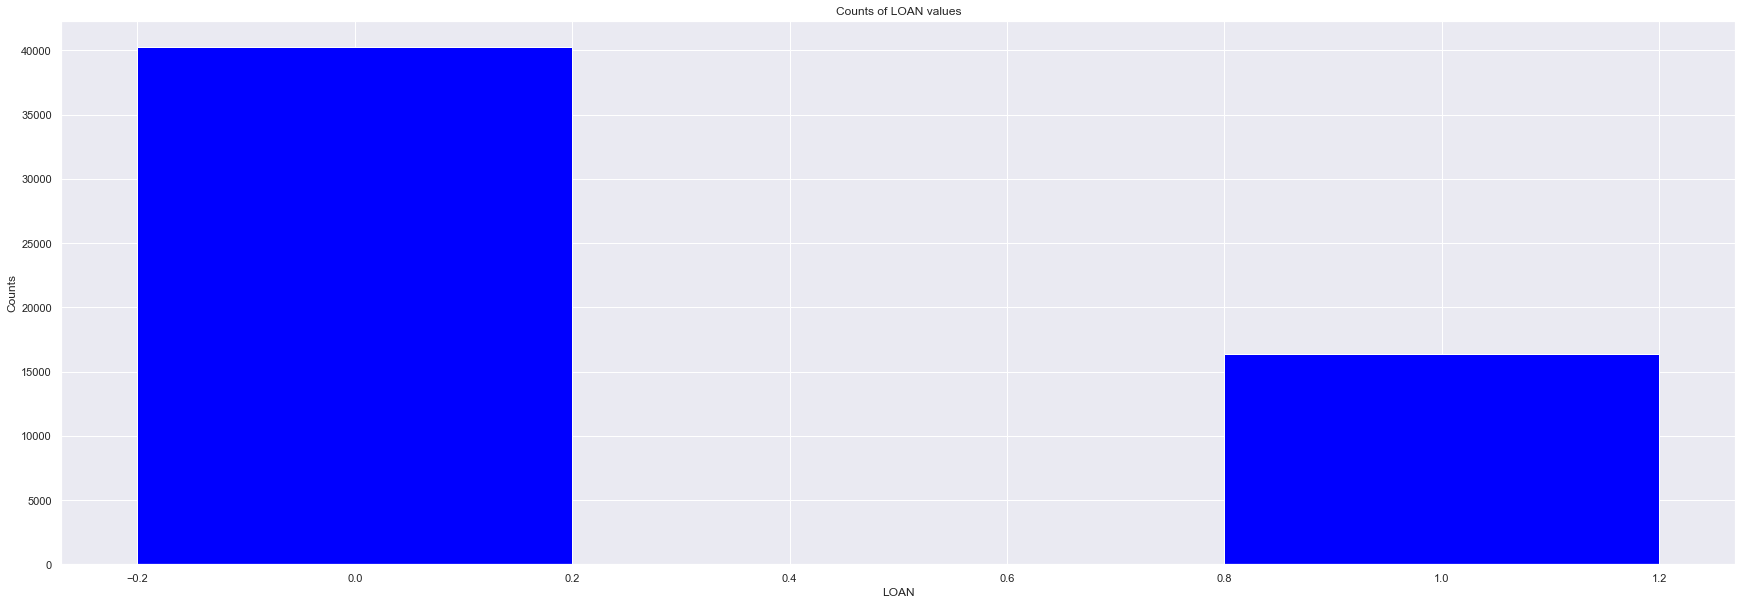

In [225]:
check_catVar('loan')

In [226]:
CrossTabCheck('loan')

0    40300
1    16376
Name: loan, dtype: int64


NORMALIZE BY BIN, OR PORTION OF CHARGE-OFFS.
loan         0         1
cos                     
0     0.987643  0.998901
1     0.012357  0.001099

NORMALIZE BY ROW, OR PORTION OF MEMBERS.
loan         0         1
cos                     
0     0.708725  0.291275
1     0.965116  0.034884

DIRECT COUNTS.
loan      0      1
cos               
0     39802  16358
1       498     18


***
### Calculations done on excel spreadsheet (not shown here)
#### P(cos yes | loan=1)	    0.00110
#### P(cos yes | loan=0)	    0.01236 (no loan associated with account)

### Feature Transform? None.

* **
***
## <span style="color:red">3: S_PLUS_C</span>
### Is account just savings, or savings and checking?
***

*** For the field s_plus_c ***

Unique values:
 [0 1]

The value counts are:
1    37776
0    18900
Name: s_plus_c, dtype: int64

Count of NULL s_plus_c values: 0
Count of NA s_plus_c values: 0
Plot out Values


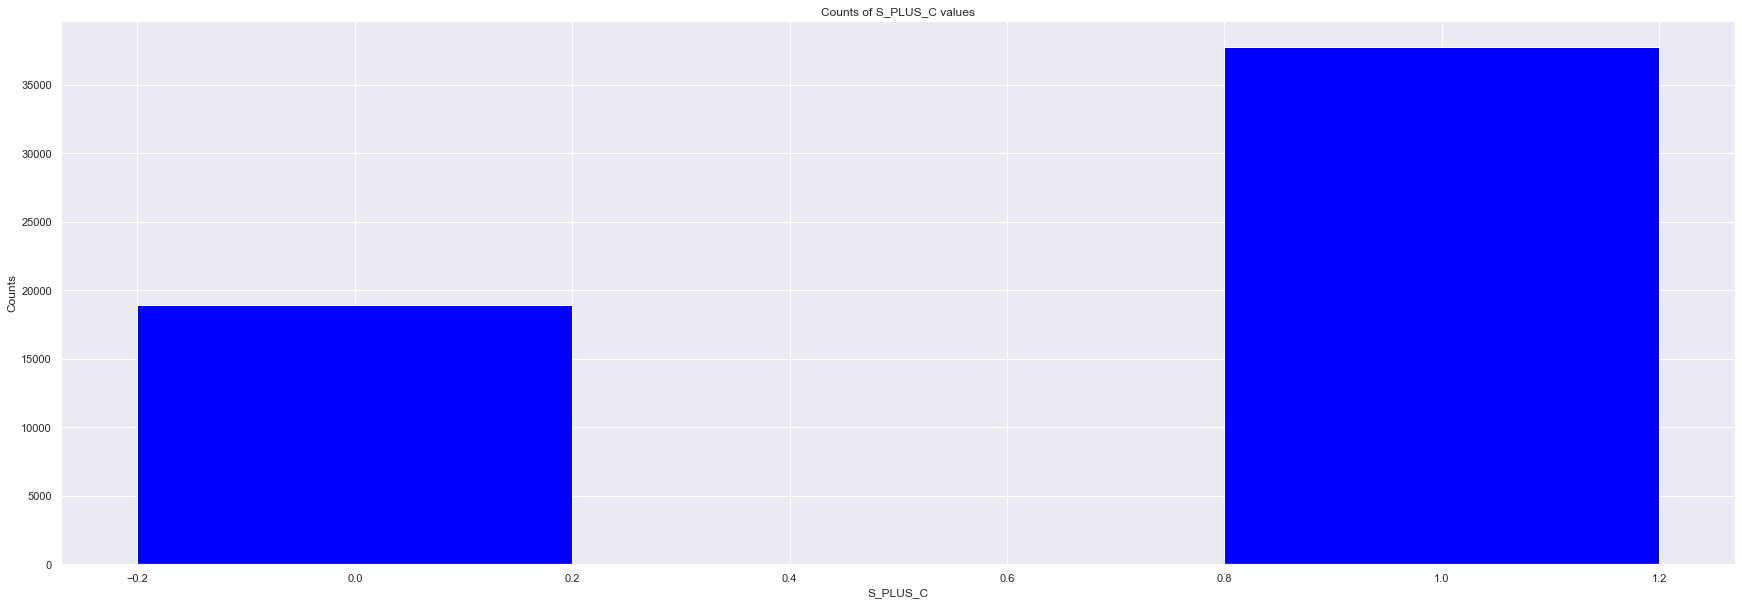

In [227]:
check_catVar('s_plus_c')

In [228]:
# Cross Tab with target field.
CrossTabCheck('s_plus_c')

1    37776
0    18900
Name: s_plus_c, dtype: int64


NORMALIZE BY BIN, OR PORTION OF CHARGE-OFFS.
s_plus_c         0         1
cos                         
0         0.995397  0.988644
1         0.004603  0.011356

NORMALIZE BY ROW, OR PORTION OF MEMBERS.
s_plus_c         0         1
cos                         
0         0.334989  0.665011
1         0.168605  0.831395

DIRECT COUNTS.
s_plus_c      0      1
cos                   
0         18813  37347
1            87    429


***
### Calculations outside of this notebook (not shown here)
#### Prob(cos yes  |  s_plus_c = 1)	=  0.011356717
#### Prob(cos yes  |  s_plus_c = 0)	=  0.004603175
#### If an account has a checking account, it is much more likely to result in charge off than saving alone.
#### Feature Transform: None

* **
***
## <span style="color:red">4: NTRIGGERS</span>
### Number of alerts from other financial institutions.
***

*** For the field ntriggers ***

Unique values:
 [ 0  2  7  3  6  8  9  1  4  5 16 11 12 10 13 14 15 18 21 17 20]

The value counts are:
0     49487
1      2192
2      1403
3       890
4       801
5       621
6       379
7       293
8       189
9       146
10       70
11       67
12       53
13       23
14       22
16       14
15       10
18        9
21        3
17        2
20        2
Name: ntriggers, dtype: int64

Count of NULL ntriggers values: 0
Count of NA ntriggers values: 0
Plot out Values


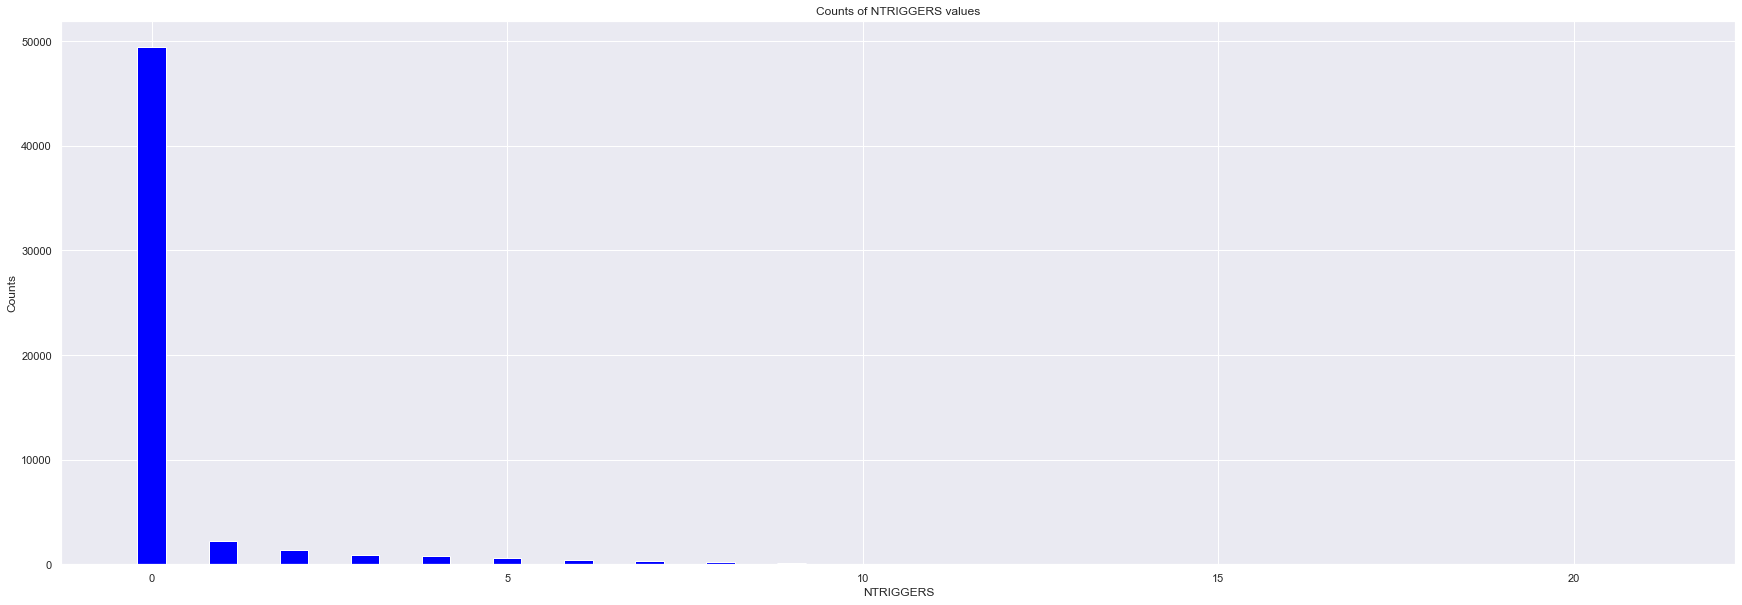

In [229]:
check_catVar('ntriggers')

In [230]:
# Cross Tab with Target Varaible
ct_cos_ntriggers = pd.crosstab(data['cos'],data['ntriggers'])
print(ct_cos_ntriggers)

ntriggers     0     1     2    3    4    5    6    7    8    9   ...  11  12  \
cos                                                              ...           
0          49303  2118  1330  829  755  589  360  283  182  141  ...  64  52   
1            184    74    73   61   46   32   19   10    7    5  ...   3   1   

ntriggers  13  14  15  16  17  18  20  21  
cos                                        
0          23  22  10  13   2   9   2   3  
1           0   0   0   1   0   0   0   0  

[2 rows x 21 columns]


In [231]:
def bin_ntriggers(x):
    if x==0:
        return "nt_zero"
    if x<2:
        return "nt_small"
    else:
        return "nt_large"

data['ntriggers_bin'] = data['ntriggers'].apply(bin_ntriggers)

CrossTabCheck('ntriggers_bin')


nt_zero     49487
nt_large     4997
nt_small     2192
Name: ntriggers_bin, dtype: int64


NORMALIZE BY BIN, OR PORTION OF CHARGE-OFFS.
ntriggers_bin  nt_large  nt_small   nt_zero
cos                                        
0              0.948369  0.966241  0.996282
1              0.051631  0.033759  0.003718

NORMALIZE BY ROW, OR PORTION OF MEMBERS.
ntriggers_bin  nt_large  nt_small   nt_zero
cos                                        
0              0.084384  0.037714  0.877902
1              0.500000  0.143411  0.356589

DIRECT COUNTS.
ntriggers_bin  nt_large  nt_small  nt_zero
cos                                       
0                  4739      2118    49303
1                   258        74      184


***
### Feature Transform: Bin into nt_zero, nt_small, nt_large

* **
***
## <span style="color:red">5: NUM_TIMES_NEG</span>
### Number of time the account went negative.
***

*** For the field num_times_neg ***

Unique values:
 [  0   1  12   3   6  25   2   5   7   8  30  58   9  31   4  14  43  11
  39  10  27  15  19  17  41  36  24  18  34  22  37  28  13  29  42  59
  16  56  35  21  67  60  48  33  38  26  20  47  94  65  32  74  23  69
  53  49  51  45  62  44  68  64 132  77  92  82  40  50 107  61  57  79
  81  75  83  63  66  78  80  46  54  52  55]

The value counts are:
0     50376
1      1933
2       952
3       595
4       398
      ...  
80        1
94        1
54        1
52        1
55        1
Name: num_times_neg, Length: 83, dtype: int64

Count of NULL num_times_neg values: 0
Count of NA num_times_neg values: 0
Plot out Values


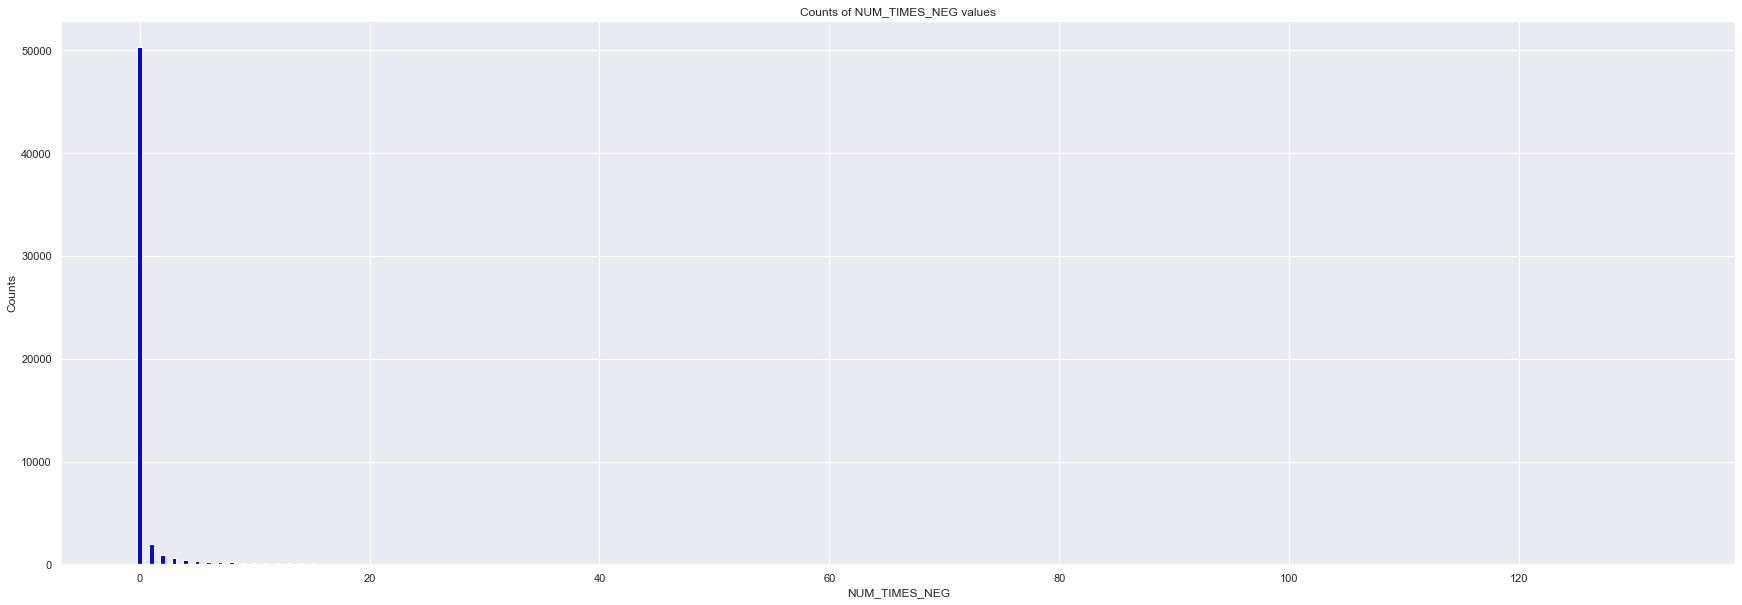

In [232]:
check_catVar('num_times_neg')

In [233]:
# Cross Tab with Target Variable
ct_cos_numtimeneg = pd.crosstab(data['cos'],data['num_times_neg'])
print(ct_cos_numtimeneg)

num_times_neg    0     1    2    3    4    5    6    7    8    9    ...  78   \
cos                                                                 ...        
0              50283  1842  877  550  374  276  227  192  171  153  ...    1   
1                 93    91   75   45   24   16   21   15   14   15  ...    0   

num_times_neg  79   80   81   82   83   92   94   107  132  
cos                                                         
0                1    1    1    2    2    1    1    1    1  
1                0    0    0    0    0    0    0    0    0  

[2 rows x 83 columns]


In [234]:
# Bin values to make them statistically significant.
data['num_times_neg_bin'] = pd.cut(data['num_times_neg'], bins=(0, 2, 25, 26, 49, 300),
                                  labels=['bin1', 'bin2', 'bin3', 'bin4', 'bin5'], right=False, include_lowest=True,
                                  ordered=False)

In [235]:
CrossTabCheck('num_times_neg_bin')

bin1    52309
bin2     3981
bin4      287
bin5       75
bin3       24
Name: num_times_neg_bin, dtype: int64


NORMALIZE BY BIN, OR PORTION OF CHARGE-OFFS.
num_times_neg_bin      bin1      bin2   bin3      bin4      bin5
cos                                                             
0                  0.996482  0.925898  0.875  0.898955  0.933333
1                  0.003518  0.074102  0.125  0.101045  0.066667

NORMALIZE BY ROW, OR PORTION OF MEMBERS.
num_times_neg_bin      bin1      bin2      bin3      bin4      bin5
cos                                                                
0                  0.928152  0.065634  0.000374  0.004594  0.001246
1                  0.356589  0.571705  0.005814  0.056202  0.009690

DIRECT COUNTS.
num_times_neg_bin   bin1  bin2  bin3  bin4  bin5
cos                                             
0                  52125  3686    21   258    70
1                    184   295     3    29     5


* **
***
## <span style="color:red">6: MAX_DAYS_NEG</span>
### Maximum consecutive days account was negative.
***

*** For the field max_days_neg ***

Unique values:
 [  0   1  74   6   7   5  53   9   2  12  11  33   3  29  31  10  21  36
  15  17  59  43  18  38  37   4  42  13  30  85  62  68  39  14  67  23
   8  26  41  45  56  49  32  88  57  28  34  27  16  93  66 135  91  48
 114  71  22  25  72  69 110  61 138 133  81  19  24  65  89  35  83 134
 111  54  95 108  20  40 137  75  78 376  47 121 131 141 147  46  64 100
  58 102  87 127  55  70  86 129 106  82 105 119  52 101  51  60  63 120
  44  98  76 132 124  99 113 116  92  50  73 123 115  94 109  79 118  90
 145 122 146 136 112  77 107  84  96 103 125 117 104 130 128  80 126]

The value counts are:
0      50376
1       1059
2       1042
3        665
4        377
       ...  
136        1
146        1
145        1
132        1
134        1
Name: max_days_neg, Length: 143, dtype: int64

Count of NULL max_days_neg values: 0
Count of NA max_days_neg values: 0
Plot out Values


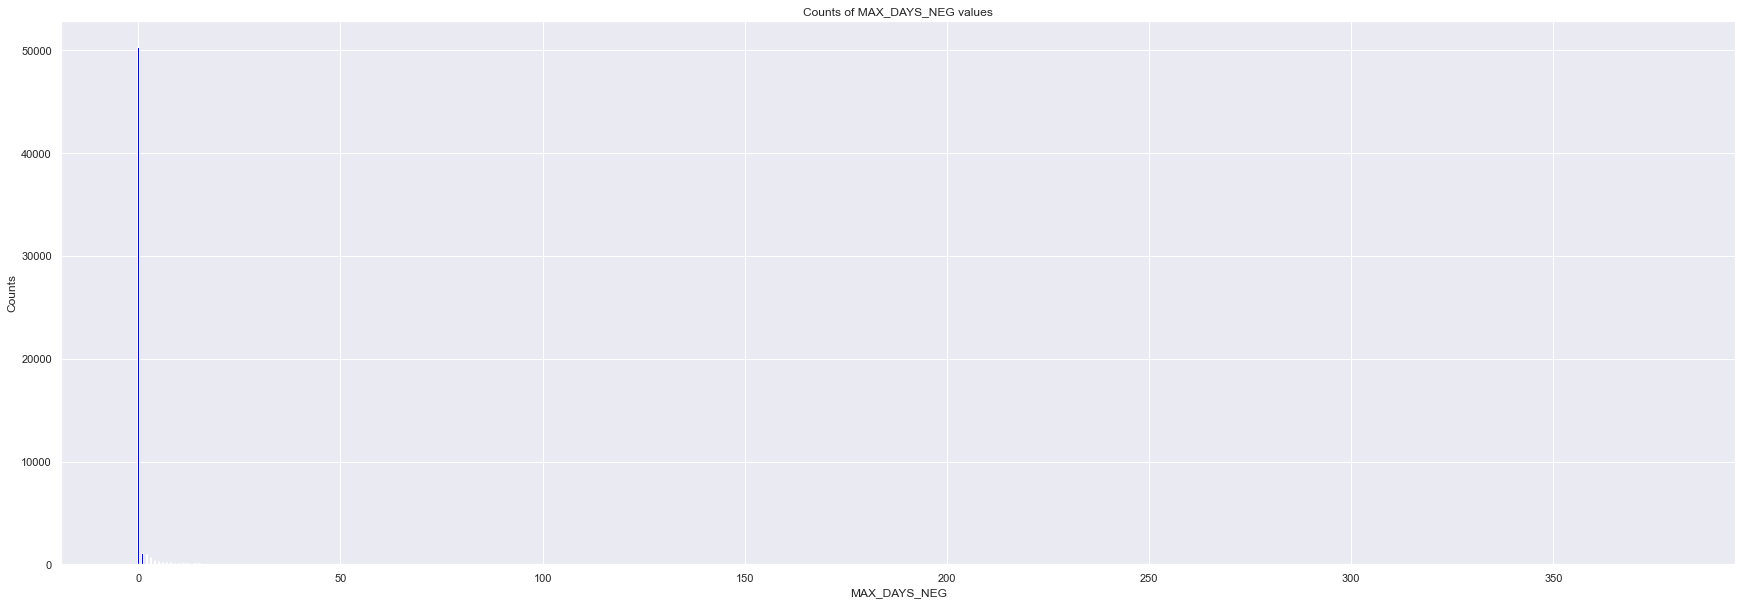

In [236]:
check_catVar('max_days_neg')

In [237]:
# Using Excel, inspect how max_days_neg field correlates with charged-off accounts.
# Modeling tactic: bin the values of max_days_neg to create statistical significance.

def bin_max_days_neg(x):
    if 0 <= x < 2:
        return 'bin1'
    if 2 <= x < 5:
        return 'bin2'
    if 5 <= x < 30:
        return 'bin3'
    if 30 <= x < 110:
        return 'bin4'
    else:
        return 'bin5'

data['max_days_neg_bin'] = data['max_days_neg'].apply(bin_max_days_neg)

CrossTabCheck('max_days_neg_bin')

bin1    51435
bin3     2338
bin2     2084
bin4      732
bin5       87
Name: max_days_neg_bin, dtype: int64


NORMALIZE BY BIN, OR PORTION OF CHARGE-OFFS.
max_days_neg_bin      bin1     bin2      bin3     bin4      bin5
cos                                                             
0                 0.997259  0.96785  0.918734  0.85929  0.827586
1                 0.002741  0.03215  0.081266  0.14071  0.172414

NORMALIZE BY ROW, OR PORTION OF MEMBERS.
max_days_neg_bin      bin1      bin2      bin3      bin4      bin5
cos                                                               
0                 0.913355  0.035915  0.038248  0.011200  0.001282
1                 0.273256  0.129845  0.368217  0.199612  0.029070

DIRECT COUNTS.
max_days_neg_bin   bin1  bin2  bin3  bin4  bin5
cos                                            
0                 51294  2017  2148   629    72
1                   141    67   190   103    15


Note on the transformation:
Use function bin_max_days_neg() to increase statistical significance and prevent over-fitting.

* **
***
## <span style="color:red">7: RIM_AGE</span>
### Age of the accout owner's membership in months
***

In [238]:
check_contVar('rim_age')


Count of NULL rim_age values: 0
Count of NA rim_age values: 0
Max value of rim_age: 42
Min value of rim_age: 0
Type of value <class 'numpy.ndarray'>
Random sample of values:
 30769    36
22687    19
38020     9
55407     1
41508     0
13512    10
33441    34
3656     35
33666    34
28705    38
Name: rim_age, dtype: int64


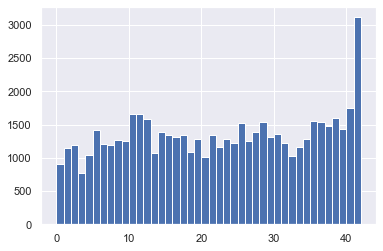

In [239]:
plt.hist(data['rim_age'], bins=42)
plt.rcParams['figure.figsize'] = (30,10)
plt.show()

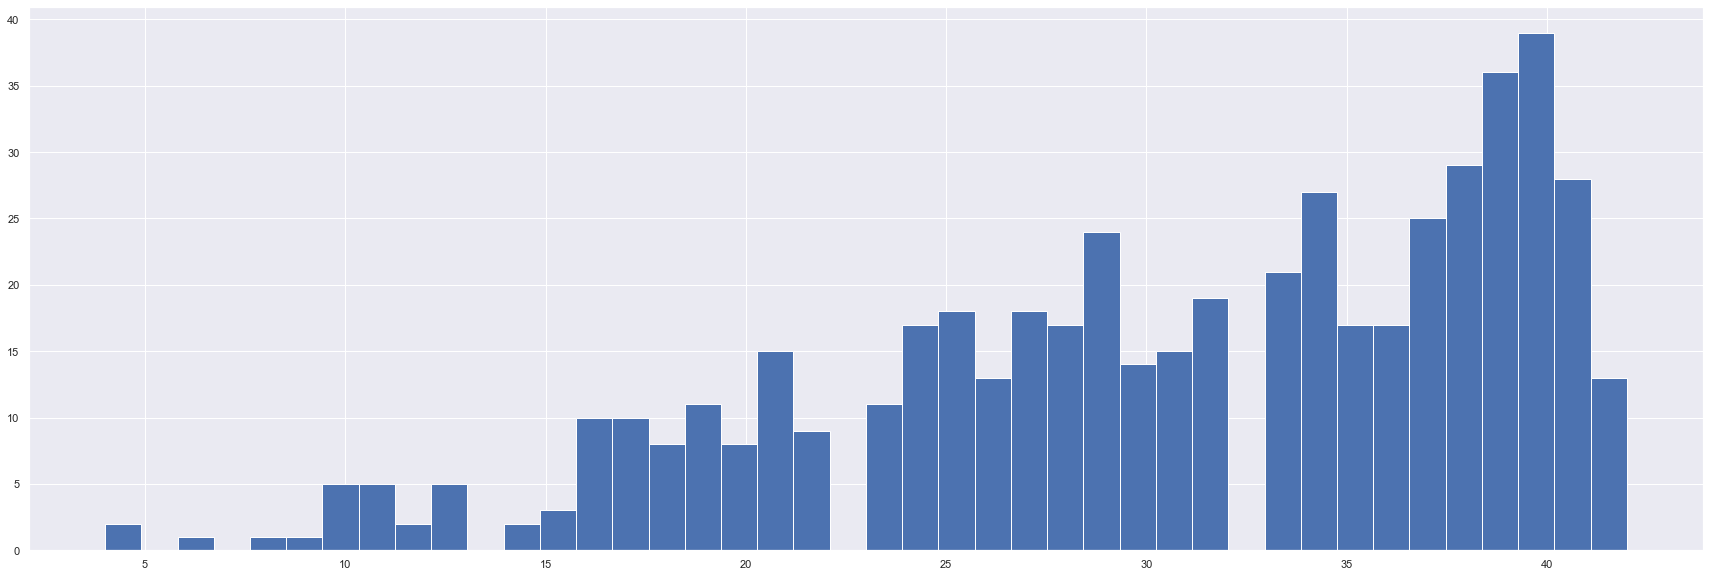

In [240]:
# what is the distribution of rim_age among those that have COS?
data_cosPOS = data[data['cos'].values == 1].copy(deep=True)
plt.hist(data_cosPOS['rim_age'], bins=42)
plt.rcParams['figure.figsize'] = (30,10)
plt.show()

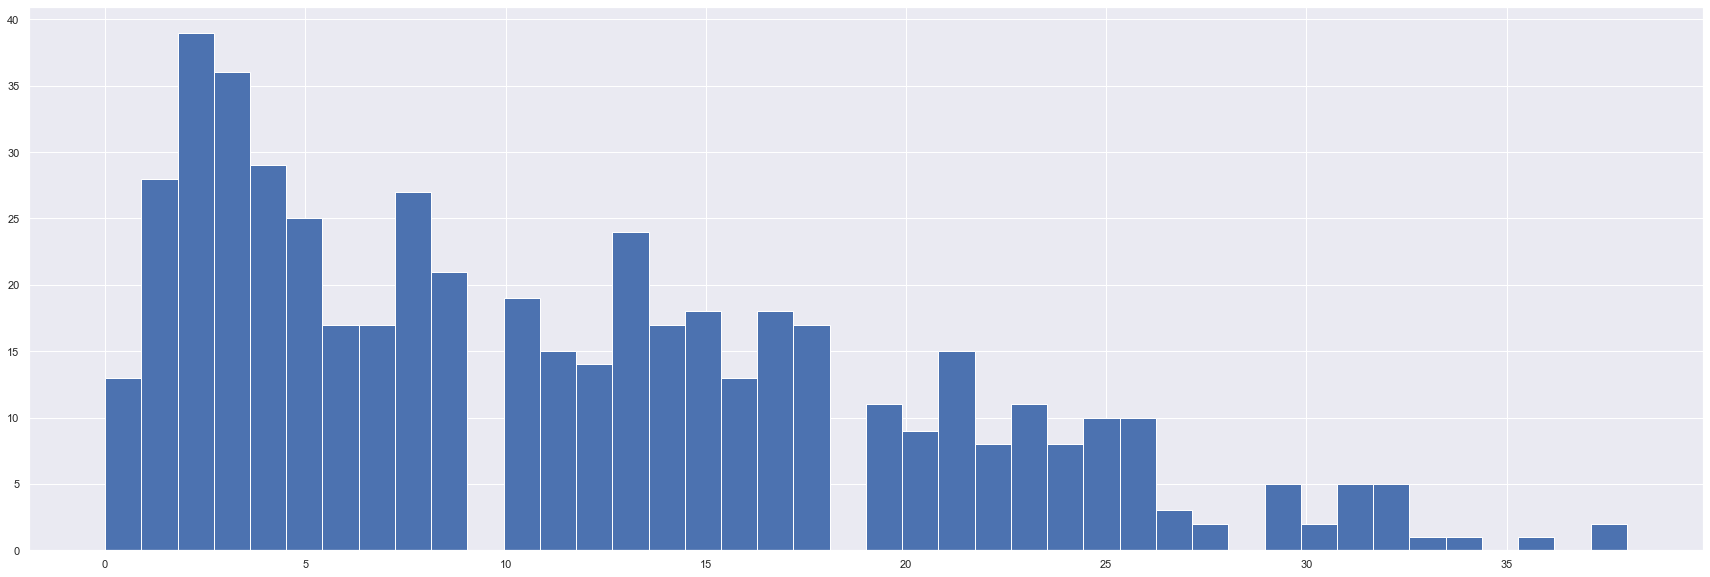

In [241]:
max_month = max(data['rim_age'])

def reverse_rim_age(x):
    return max_month - x

data['rim_age_reverse'] = data['rim_age'].apply(reverse_rim_age)

data_cosPOS = data[data['cos'].values == 1].copy(deep=True)
plt.hist(data_cosPOS['rim_age_reverse'], bins=42)
plt.rcParams['figure.figsize'] = (30,10)
plt.show()

The distribution of rim_age with COS is counter to what we would expect. I wonder if the age value has been reversed. Test when the rim_age values are reversed.
Possible transform: f(rim_age) = max(rim_age) - rim_age

* **
***
## <span style="color:red">8: CK_RETURNS</span>
### Number of returned checks since Jan. 2017
***

In [242]:
check_contVar('ck_returns')


Count of NULL ck_returns values: 55841
Count of NA ck_returns values: 55841
Max value of ck_returns: 11.0
Min value of ck_returns: 1.0
Type of value <class 'numpy.ndarray'>
Random sample of values:
 32537   NaN
21534   NaN
6819    NaN
55445   NaN
22480   NaN
17144   NaN
31424   NaN
44341   NaN
16548   NaN
14284   NaN
Name: ck_returns, dtype: float64


In [243]:
data['ck_returns'] = data['ck_returns'].fillna(0)

In [244]:
check_contVar("ck_returns")


Count of NULL ck_returns values: 0
Count of NA ck_returns values: 0
Max value of ck_returns: 11.0
Min value of ck_returns: 0.0
Type of value <class 'numpy.ndarray'>
Random sample of values:
 43154    0.0
34775    0.0
3897     0.0
39716    0.0
10139    0.0
53227    0.0
12609    0.0
14051    0.0
8905     0.0
22669    0.0
Name: ck_returns, dtype: float64


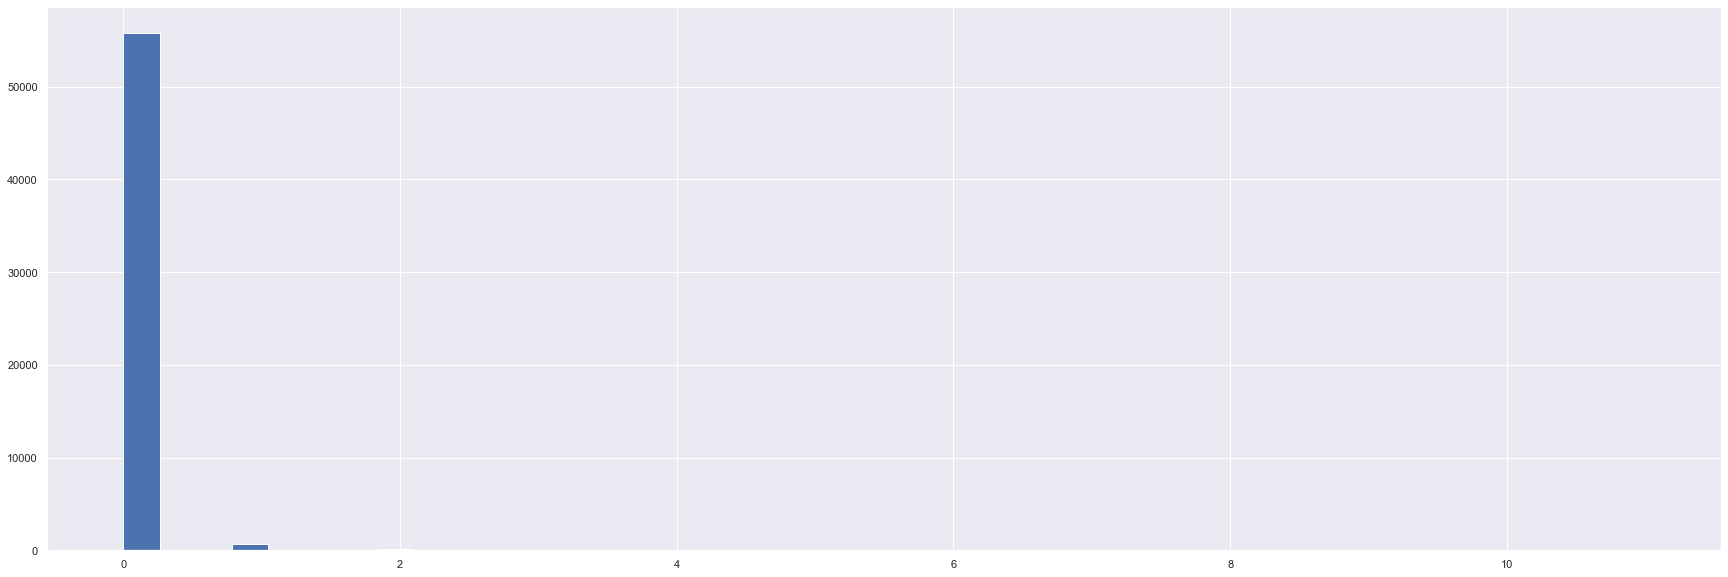

In [245]:
plt.hist(data['ck_returns'], bins=42)
plt.rcParams['figure.figsize'] = (30,10)
plt.show()

In [246]:
tmp = data[data['ck_returns'] != 0]
tmp['ck_returns']

22       1.0
24       2.0
26       3.0
27       1.0
34       4.0
        ... 
55835    1.0
55836    1.0
55888    1.0
55935    1.0
56153    1.0
Name: ck_returns, Length: 835, dtype: float64

In [247]:
def bin_ckreturns(x):
    if x==0:
        return 'bin1'
    if 1<=x<2:
        return 'bin2'
    if 2<=x<7:
        return 'bin3'
    if x>=7:
        return 'bin4'

data['ck_returns_bin'] = data['ck_returns'].apply(bin_ckreturns)
CrossTabCheck('ck_returns_bin')


bin1    55841
bin2      646
bin3      177
bin4       12
Name: ck_returns_bin, dtype: int64


NORMALIZE BY BIN, OR PORTION OF CHARGE-OFFS.
ck_returns_bin      bin1      bin2      bin3      bin4
cos                                                   
0               0.992246  0.928793  0.813559  0.666667
1               0.007754  0.071207  0.186441  0.333333

NORMALIZE BY ROW, OR PORTION OF MEMBERS.
ck_returns_bin      bin1      bin2      bin3      bin4
cos                                                   
0               0.986610  0.010684  0.002564  0.000142
1               0.839147  0.089147  0.063953  0.007752

DIRECT COUNTS.
ck_returns_bin   bin1  bin2  bin3  bin4
cos                                    
0               55408   600   144     8
1                 433    46    33     4


* **
***
## <span style="color:red">9: FICO_B</span>
### FICO credit score
***

In [248]:
check_contVar("fico_b")


Count of NULL fico_b values: 0
Count of NA fico_b values: 0
Max value of fico_b: 844
Min value of fico_b: 0
Type of value <class 'numpy.ndarray'>
Random sample of values:
 27595      0
9801       0
53546      0
32051      0
7163     707
37009    528
25436    745
10050      0
31246    560
33174    813
Name: fico_b, dtype: int64


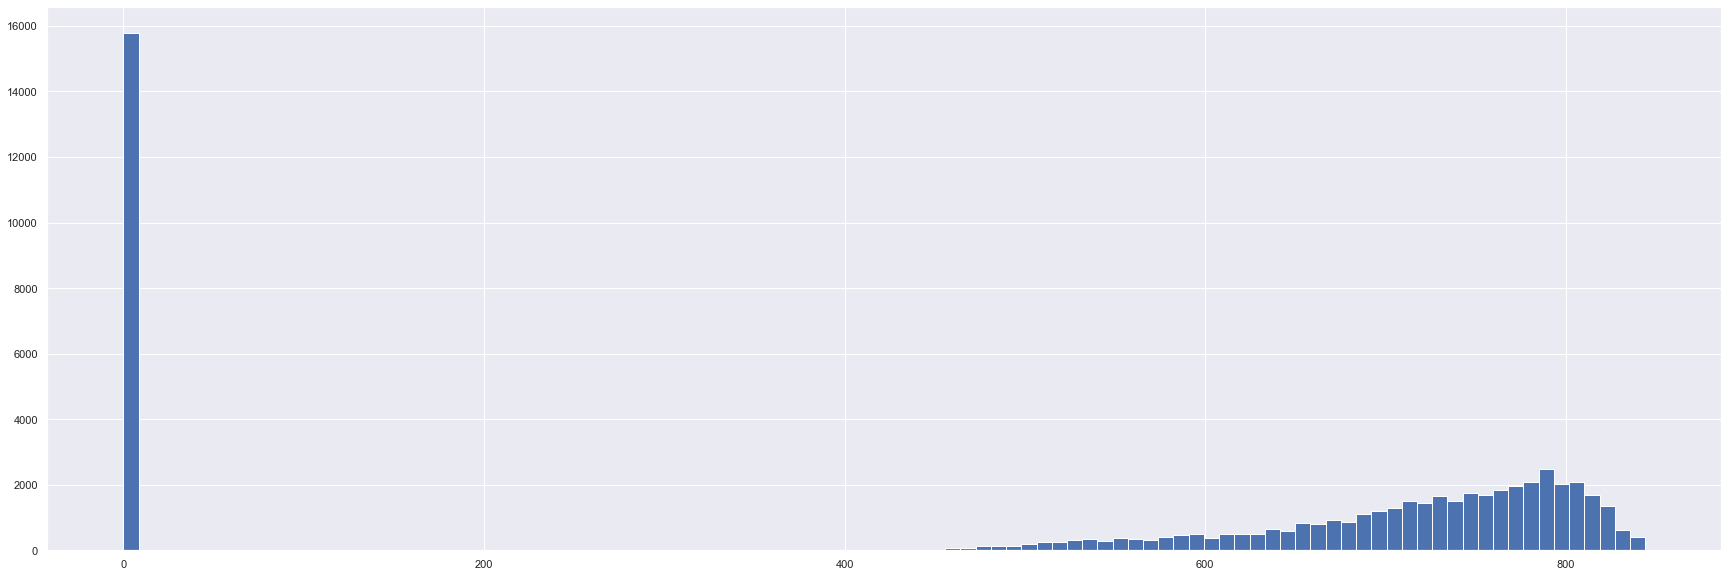

In [249]:
plt.hist(data['fico_b'], bins=100)
plt.rcParams['figure.figsize'] = (30,10)
plt.show()

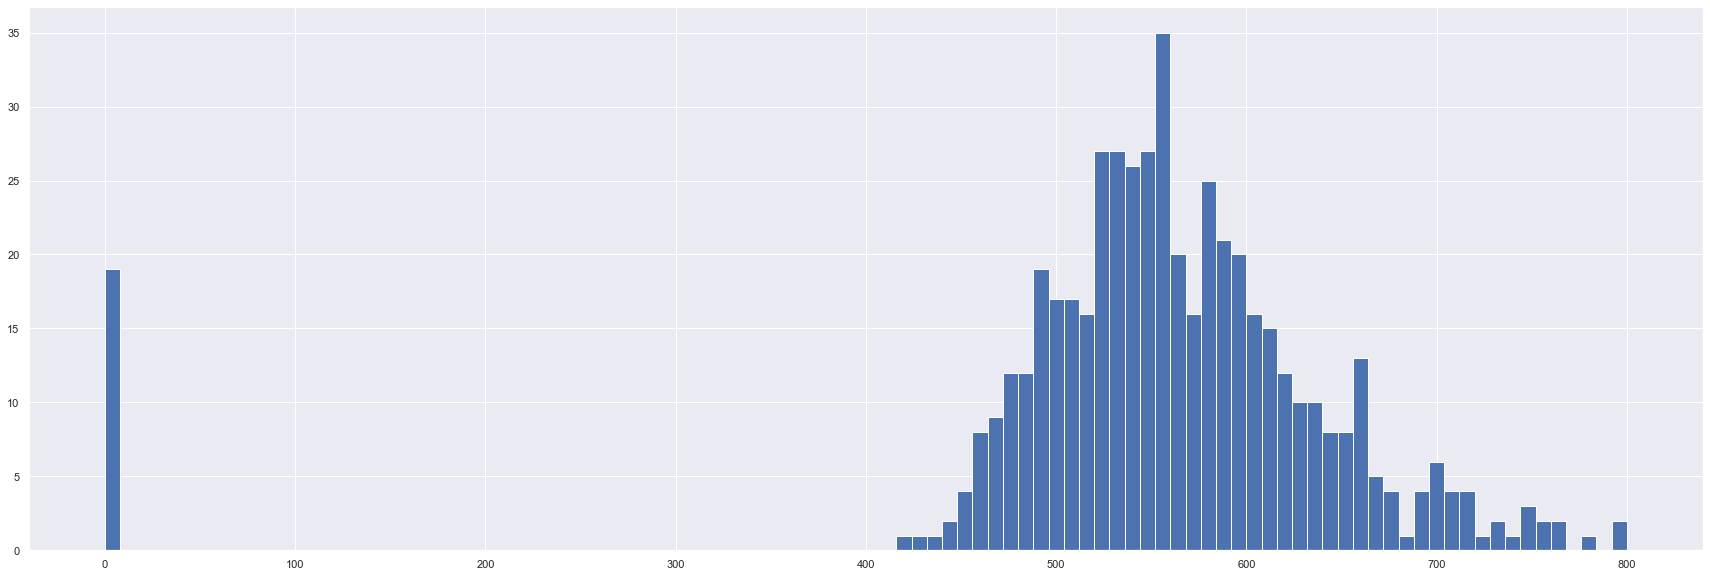

In [250]:
# what is the distribution of rim_age among those that have COS?
data_cosPOS = data[data['cos'].values == 1].copy(deep=True)
plt.hist(data_cosPOS['fico_b'], bins=100)
plt.rcParams['figure.figsize'] = (30,10)
plt.show()

In [251]:
# How many fico scores are 0?
COSall_FICO_Zero = data[data['fico_b'] == 0]
print("Count of FICO scores = 0: ", COSall_FICO_Zero.shape[0])
COSpos_FICO_Zero = data[(data['fico_b'] == 0) & (data['cos'] == 1)]
print("Count of FICO scores = 0 AND COS positive: ", COSpos_FICO_Zero.shape[0])

Count of FICO scores = 0:  15795
Count of FICO scores = 0 AND COS positive:  19


In [252]:
def fico_bin_f(x):
    bin = 'bin0'
    if x==0:
        bin = 'bin1'
    if 0 < x < 480:
        bin = 'bin2'
    if 480 <= x < 550:
        bin = 'bin3'
    if 550 <= x < 600:
        bin = 'bin4'
    if 600 <= x < 680:
        bin = 'bin5'
    if 680 <= x < 740:
        bin = 'bin6'
    if 700 <= x:
        bin = 'bin7'
    return bin

data['fico_bin'] = data['fico_b'].apply(fico_bin_f)

CrossTabCheck('fico_bin')

bin7    27565
bin1    15795
bin5     6065
bin6     2598
bin4     2356
bin3     1977
bin2      320
Name: fico_bin, dtype: int64


NORMALIZE BY BIN, OR PORTION OF CHARGE-OFFS.
fico_bin      bin1     bin2      bin3      bin4      bin5      bin6      bin7
cos                                                                          
0         0.998797  0.88125  0.909459  0.938031  0.983347  0.997306  0.999057
1         0.001203  0.11875  0.090541  0.061969  0.016653  0.002694  0.000943

NORMALIZE BY ROW, OR PORTION OF MEMBERS.
fico_bin      bin1      bin2      bin3      bin4      bin5      bin6      bin7
cos                                                                           
0         0.280912  0.005021  0.032016  0.039352  0.106197  0.046136  0.490367
1         0.036822  0.073643  0.346899  0.282946  0.195736  0.013566  0.050388

DIRECT COUNTS.
fico_bin   bin1  bin2  bin3  bin4  bin5  bin6   bin7
cos                                                 
0         15776   282  1798  2210 

Fico_b needs to be binned to make the results more statistical significant.

* **
***
## <span style="color:red">10 and 11: AVG_BAL6 and AVG_BAL3</span>
### Rolling 6-month/3-month deposit amount
***

In [253]:
check_contVar('avg_bal6')


Count of NULL avg_bal6 values: 5450
Count of NA avg_bal6 values: 5450
Max value of avg_bal6: 1708350.0
Min value of avg_bal6: -4674.0
Type of value <class 'numpy.ndarray'>
Random sample of values:
 4486     157008.0
11279        19.0
52843        30.0
14988      3238.0
56098         NaN
32037      1624.0
32709      5223.0
34354         5.0
15144        13.0
12995     55437.0
Name: avg_bal6, dtype: float64


In [254]:
# Consider NA or missing values as 0.
data['avg_bal6'] = data['avg_bal6'].fillna(0)
data['avg_bal3'] = data['avg_bal3'].fillna(0)
check_contVar('avg_bal6')
check_contVar('avg_bal3')


Count of NULL avg_bal6 values: 0
Count of NA avg_bal6 values: 0
Max value of avg_bal6: 1708350.0
Min value of avg_bal6: -4674.0
Type of value <class 'numpy.ndarray'>
Random sample of values:
 48387        20.0
8029          5.0
28983        -4.0
7770        329.0
31463         0.0
12991      3889.0
49665       241.0
45963    115714.0
37957       950.0
20037        20.0
Name: avg_bal6, dtype: float64

Count of NULL avg_bal3 values: 0
Count of NA avg_bal3 values: 0
Max value of avg_bal3: 1748436.0
Min value of avg_bal3: -6230.0
Type of value <class 'numpy.ndarray'>
Random sample of values:
 49767       24.0
31847     7180.0
52142    17282.0
45288       29.0
45616     6111.0
43514        0.0
20224     5429.0
35679    19224.0
16822       25.0
2433     36602.0
Name: avg_bal3, dtype: float64


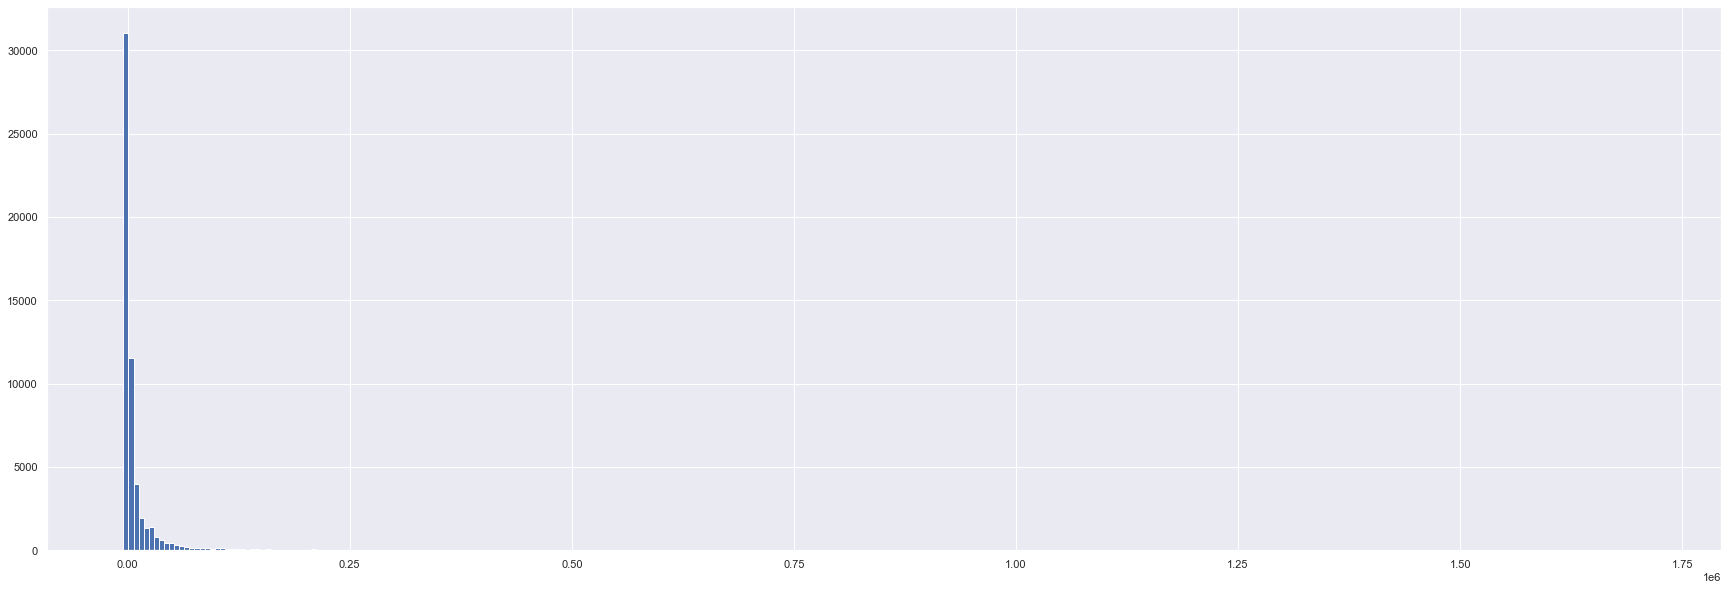

In [255]:
plt.hist(data['avg_bal6'], bins=300)
plt.rcParams['figure.figsize'] = (30,10)
plt.show()

In [256]:
# Binning avg_bal6, avg_bal3
def bin(x):
    if x<0:
        return "negative"
    if x==0:
        return 'zero'
    else:
        return 'positive'

data['avg_bal6_binned'] = data['avg_bal6'].apply(bin)
data['avg_bal3_binned'] = data['avg_bal3'].apply(bin)

In [257]:
field = 'avg_bal6_binned'

print(data[field].value_counts())
print("\n")

print("Normalize by bin, or portion of charge-offs.".upper())
ct1 = pd.crosstab(data['cos'], data[field]).apply(lambda r:r/r.sum(), axis=0)
print(ct1)

print("\nNormalize by row, or portion of members.".upper())
ct2 = pd.crosstab(data['cos'], data[field]).apply(lambda r:r/r.sum(), axis=1)
print(ct2)

print("\nDirect Counts.".upper())
ct3 = pd.crosstab(data['cos'], data[field])
print(ct3)

positive    50505
zero         5821
negative      350
Name: avg_bal6_binned, dtype: int64


NORMALIZE BY BIN, OR PORTION OF CHARGE-OFFS.
avg_bal6_binned  negative  positive      zero
cos                                          
0                    0.76  0.999485  0.930253
1                    0.24  0.000515  0.069747

NORMALIZE BY ROW, OR PORTION OF MEMBERS.
avg_bal6_binned  negative  positive      zero
cos                                          
0                0.004736  0.898843  0.096421
1                0.162791  0.050388  0.786822

DIRECT COUNTS.
avg_bal6_binned  negative  positive  zero
cos                                      
0                     266     50479  5415
1                      84        26   406


In [258]:
CrossTabCheck("avg_bal3_binned")

positive    49828
zero         6498
negative      350
Name: avg_bal3_binned, dtype: int64


NORMALIZE BY BIN, OR PORTION OF CHARGE-OFFS.
avg_bal3_binned  negative  positive      zero
cos                                          
0                    0.86  0.999378  0.932902
1                    0.14  0.000622  0.067098

NORMALIZE BY ROW, OR PORTION OF MEMBERS.
avg_bal3_binned  negative  positive      zero
cos                                          
0                0.005360  0.886699  0.107942
1                0.094961  0.060078  0.844961

DIRECT COUNTS.
avg_bal3_binned  negative  positive  zero
cos                                      
0                     301     49797  6062
1                      49        31   436


In [259]:
data.columns

Index(['account_id', 'status', 'cos', 'rim_age', 'loan', 's_plus_c', 'fico_b',
       'ck_returns', 'max_days_neg', 'num_times_neg', 'ntriggers', 'avg_bal6',
       'avg_bal3', 'ntriggers_bin', 'num_times_neg_bin', 'max_days_neg_bin',
       'rim_age_reverse', 'ck_returns_bin', 'fico_bin', 'avg_bal6_binned',
       'avg_bal3_binned'],
      dtype='object')

In [260]:
# Output

data.to_csv("data_with_features.csv")